

## Importando librerías


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Activation, GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras.applications import vgg16

import sklearn.metrics as metrics
import scipy


## Cargando dataset

In [10]:
from google.colab import drive
drive.mount('/content/drive')
directorioBase = '/content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Variables de Datos de Imágenes de entrada

In [11]:
IMAGEN_ALTO = 100
IMAGEN_ANCHO = 100
NUM_COLORES = 3
input_shp = (IMAGEN_ALTO,IMAGEN_ANCHO,3)

## Modelo1

In [12]:
# Modelo 1
# Arquitectura de la Red
modelo1 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shp),
    keras.layers.Dense(2, activation='softmax')
])

##Compilación de la Red 

In [13]:
# Compilar el modelo
modelo1.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 60002     
                                                                 
Total params: 60,002
Trainable params: 60,002
Non-trainable params: 0
_________________________________________________________________


In [14]:
#carga e iteracion carpeta 'train' (960 elementos por subcarpeta)
generadorDatos = ImageDataGenerator(rescale=1. / 255)



iteradorTrain = generadorDatos.flow_from_directory(directory=directorioBase + '/train',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorValidation = generadorDatos.flow_from_directory(directory=directorioBase + '/val',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorTest = generadorDatos.flow_from_directory(directory=directorioBase+'/test',
                                      class_mode='binary',  shuffle=True,
                                      batch_size=96, target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


##Callbacks

In [15]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpoint1'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

##Entrenando la Red

In [16]:
print("Training model 1 ..")
historial1 = modelo1.fit_generator(iteradorTrain,
                                  validation_data=iteradorValidation,
                                  steps_per_epoch=960//96,
                                  validation_steps=240//96,
                                  epochs=50,
                                  verbose=True,
                                  callbacks=[Modle_Checkpoint])



print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = modelo1.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model 1 ..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.6031 - accuracy: 0.6740 
Epoch 1: val_loss improved from inf to 0.48549, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 535s 56s/step - loss: 0.6031 - accuracy: 0.6740 - val_loss: 0.4855 - val_accuracy: 0.8177
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.4148 - accuracy: 0.8177 
Epoch 2: val_loss improved from 0.48549 to 0.39923, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 134s 14s/step - loss: 0.4148 - accuracy: 0.8177 - val_loss: 0.3992 - val_accuracy: 0.8438
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.3299 - accuracy: 0.8729
Epoch 3: val_loss improved from 0.39923 to 0.39020, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 69s 7s/step - loss: 0.3299 - accuracy: 0.8729 - val_loss: 0.3902 - val_accuracy: 0.8490
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.3114 - accuracy: 0.8698
Epoch 4: val_loss did not improve from 0.39020
10/10 [==============================] - 29s 3s/step - loss: 0.3114 - accuracy: 0.8698 - val_loss: 0.4105 - val_accuracy: 0.8490
Epoch 5/50
10/10 [==============================] - ETA: 0s - loss: 0.3109 - accuracy: 0.8552
Epoch 5: val_loss improved from 0.39020 to 0.36545, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 21s 2s/step - loss: 0.3109 - accuracy: 0.8552 - val_loss: 0.3655 - val_accuracy: 0.8646
Epoch 6/50
10/10 [==============================] - ETA: 0s - loss: 0.3019 - accuracy: 0.8677
Epoch 6: val_loss did not improve from 0.36545
10/10 [==============================] - 9s 995ms/step - loss: 0.3019 - accuracy: 0.8677 - val_loss: 0.3936 - val_accuracy: 0.8385
Epoch 7/50
10/10 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.8823
Epoch 7: val_loss did not improve from 0.36545
10/10 [==============================] - 4s 433ms/step - loss: 0.2964 - accuracy: 0.8823 - val_loss: 0.4043 - val_accuracy: 0.8333
Epoch 8/50
10/10 [==============================] - ETA: 0s - loss: 0.2797 - accuracy: 0.8948
Epoch 8: val_loss did not improve from 0.36545
10/10 [==============================] - 4s 311ms/step - loss: 0.2797 - accuracy: 0.8948 - val_loss: 0.3874 - val_accuracy: 0.8542
Epoch 9/50
10/10 [==============================] - ETA

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 4s 385ms/step - loss: 0.2910 - accuracy: 0.8760 - val_loss: 0.3530 - val_accuracy: 0.8646
Epoch 10/50
10/10 [==============================] - ETA: 0s - loss: 0.2872 - accuracy: 0.8844
Epoch 10: val_loss did not improve from 0.35302
10/10 [==============================] - 3s 334ms/step - loss: 0.2872 - accuracy: 0.8844 - val_loss: 0.3914 - val_accuracy: 0.8542
Epoch 11/50
10/10 [==============================] - ETA: 0s - loss: 0.2732 - accuracy: 0.8844
Epoch 11: val_loss did not improve from 0.35302
10/10 [==============================] - 3s 263ms/step - loss: 0.2732 - accuracy: 0.8844 - val_loss: 0.3913 - val_accuracy: 0.8385
Epoch 12/50
10/10 [==============================] - ETA: 0s - loss: 0.2935 - accuracy: 0.8823
Epoch 12: val_loss did not improve from 0.35302
10/10 [==============================] - 3s 260ms/step - loss: 0.2935 - accuracy: 0.8823 - val_loss: 0.4416 - val_accuracy: 0.8333
Epoch 13/50
10/10 [============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 3s 287ms/step - loss: 0.2522 - accuracy: 0.8990 - val_loss: 0.3432 - val_accuracy: 0.8802
Epoch 19/50
10/10 [==============================] - ETA: 0s - loss: 0.2422 - accuracy: 0.8990
Epoch 19: val_loss did not improve from 0.34316
10/10 [==============================] - 2s 248ms/step - loss: 0.2422 - accuracy: 0.8990 - val_loss: 0.3942 - val_accuracy: 0.8542
Epoch 20/50
10/10 [==============================] - ETA: 0s - loss: 0.2525 - accuracy: 0.8948
Epoch 20: val_loss did not improve from 0.34316
10/10 [==============================] - 2s 253ms/step - loss: 0.2525 - accuracy: 0.8948 - val_loss: 0.3537 - val_accuracy: 0.8438
Epoch 21/50
10/10 [==============================] - ETA: 0s - loss: 0.2687 - accuracy: 0.8906
Epoch 21: val_loss improved from 0.34316 to 0.33530, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 3s 304ms/step - loss: 0.2687 - accuracy: 0.8906 - val_loss: 0.3353 - val_accuracy: 0.8646
Epoch 22/50
10/10 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.8927
Epoch 22: val_loss improved from 0.33530 to 0.33027, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 3s 302ms/step - loss: 0.2631 - accuracy: 0.8927 - val_loss: 0.3303 - val_accuracy: 0.8854
Epoch 23/50
10/10 [==============================] - ETA: 0s - loss: 0.2351 - accuracy: 0.9104
Epoch 23: val_loss did not improve from 0.33027
10/10 [==============================] - 2s 253ms/step - loss: 0.2351 - accuracy: 0.9104 - val_loss: 0.3512 - val_accuracy: 0.8646
Epoch 24/50
10/10 [==============================] - ETA: 0s - loss: 0.2344 - accuracy: 0.9073
Epoch 24: val_loss did not improve from 0.33027
10/10 [==============================] - 3s 259ms/step - loss: 0.2344 - accuracy: 0.9073 - val_loss: 0.3956 - val_accuracy: 0.8385
Epoch 25/50
10/10 [==============================] - ETA: 0s - loss: 0.2393 - accuracy: 0.9031
Epoch 25: val_loss did not improve from 0.33027
10/10 [==============================] - 3s 260ms/step - loss: 0.2393 - accuracy: 0.9031 - val_loss: 0.3830 - val_accuracy: 0.8438
Epoch 26/50
10/10 [============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets


10/10 [==============================] - 3s 309ms/step - loss: 0.2390 - accuracy: 0.9031 - val_loss: 0.3030 - val_accuracy: 0.8906
Epoch 30/50
10/10 [==============================] - ETA: 0s - loss: 0.2513 - accuracy: 0.9125
Epoch 30: val_loss did not improve from 0.30298
10/10 [==============================] - 3s 255ms/step - loss: 0.2513 - accuracy: 0.9125 - val_loss: 0.3797 - val_accuracy: 0.8698
Epoch 31/50
10/10 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.9187
Epoch 31: val_loss did not improve from 0.30298
10/10 [==============================] - 3s 285ms/step - loss: 0.2307 - accuracy: 0.9187 - val_loss: 0.4144 - val_accuracy: 0.8385
Epoch 32/50
10/10 [==============================] - ETA: 0s - loss: 0.2424 - accuracy: 0.9083
Epoch 32: val_loss did not improve from 0.30298
10/10 [==============================] - 3s 294ms/step - loss: 0.2424 - accuracy: 0.9083 - val_loss: 0.4005 - val_accuracy: 0.8281
Epoch 33/50
10/10 [============================

##Visualización de Datos


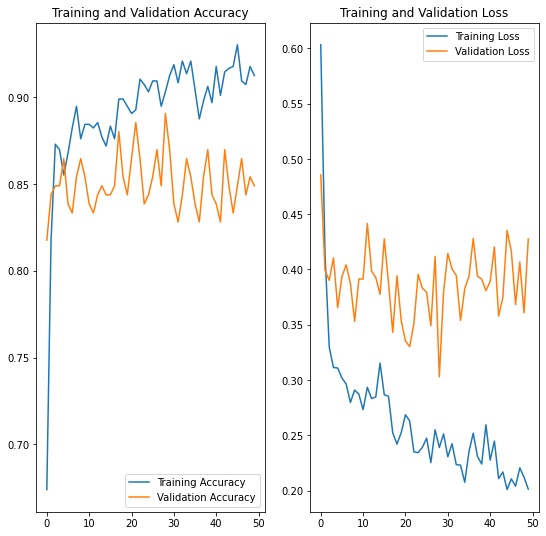

In [17]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial1.history)

# Visualizar los resultados de training y validation
acc_1 = historial1.history['accuracy']
val_acc_1 = historial1.history['val_accuracy']

loss_1 = historial1.history['loss']
val_loss_1 = historial1.history['val_loss']

epochs_range_1 = range(len(acc_1))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_1, acc_1, label='Training Accuracy')
plt.plot(epochs_range_1, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_1, loss_1, label='Training Loss')
plt.plot(epochs_range_1, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [18]:
test_loss_1, test_acc_1 = modelo1.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_1)
print('\nTest loss:', test_loss_1)

# evaluate model
loss_1 = modelo1.evaluate_generator(iteradorTest, steps=24)
print(loss_1)

3/3 - 110s - loss: 0.3349 - accuracy: 0.8750 - 110s/epoch - 37s/step

Test accuracy: 0.875

Test loss: 0.3349209129810333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


[0.33492088317871094, 0.875]


##Loss Graph

In [19]:
# Visualize training results
loss_1 = historial1.history['loss']

val_loss_1 = historial1.history['val_loss']


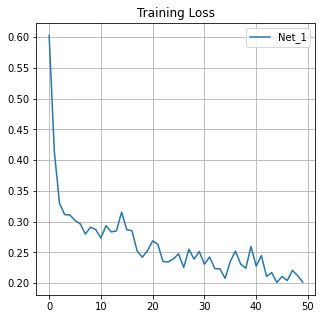

In [20]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_1, loss_1, label='Net_1')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_m1.pdf')

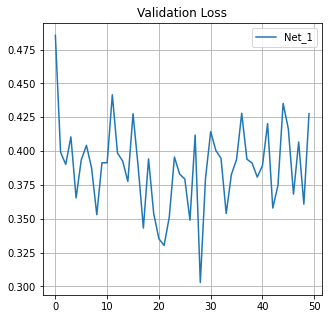

In [21]:
plt.figure(figsize=(5, 5))
plt.plot(epochs_range_1, val_loss_1, label='Net_1')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_loss_m1.pdf')


##Test Accuracy

In [22]:
print('Test accuracy first model:', test_acc_1)

Test accuracy first model: 0.875




## Importando librerías


## Modelo2

In [23]:
# Modelo 2
# Arquitectura de la Red
modelo2 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shp),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

##Compilación de la Red 

In [24]:
# Compilar el modelo
modelo2.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

modelo2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_2 (Dense)             (None, 400)               12000400  
                                                                 
 dense_3 (Dense)             (None, 100)               40100     
                                                                 
 dense_4 (Dense)             (None, 2)                 202       
                                                                 
Total params: 12,040,702
Trainable params: 12,040,702
Non-trainable params: 0
_________________________________________________________________


##Callbacks

In [25]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpoint2'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

##Entrenando la Red

In [26]:
print("Training model 2 ..")
historial2 = modelo2.fit_generator(iteradorTrain,
                                  validation_data=iteradorValidation,
                                  steps_per_epoch=960//96,
                                  validation_steps=240//96,
                                  epochs=50,
                                  verbose=True,
                                  callbacks=[Modle_Checkpoint])



print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = modelo2.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model 2 ..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.9637 - accuracy: 0.6344
Epoch 1: val_loss improved from inf to 0.54428, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 7s 666ms/step - loss: 0.9637 - accuracy: 0.6344 - val_loss: 0.5443 - val_accuracy: 0.7500
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.4186 - accuracy: 0.8146
Epoch 2: val_loss improved from 0.54428 to 0.45079, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 5s 483ms/step - loss: 0.4186 - accuracy: 0.8146 - val_loss: 0.4508 - val_accuracy: 0.8021
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.3586 - accuracy: 0.8510
Epoch 3: val_loss improved from 0.45079 to 0.42131, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 4s 420ms/step - loss: 0.3586 - accuracy: 0.8510 - val_loss: 0.4213 - val_accuracy: 0.8281
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.2970 - accuracy: 0.8760
Epoch 4: val_loss improved from 0.42131 to 0.30804, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 4s 446ms/step - loss: 0.2970 - accuracy: 0.8760 - val_loss: 0.3080 - val_accuracy: 0.8958
Epoch 5/50
10/10 [==============================] - ETA: 0s - loss: 0.2761 - accuracy: 0.8813
Epoch 5: val_loss improved from 0.30804 to 0.28026, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 6s 651ms/step - loss: 0.2761 - accuracy: 0.8813 - val_loss: 0.2803 - val_accuracy: 0.9115
Epoch 6/50
10/10 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.8948
Epoch 6: val_loss did not improve from 0.28026
10/10 [==============================] - 3s 306ms/step - loss: 0.2307 - accuracy: 0.8948 - val_loss: 0.3093 - val_accuracy: 0.8906
Epoch 7/50
10/10 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.9010
Epoch 7: val_loss did not improve from 0.28026
10/10 [==============================] - 3s 312ms/step - loss: 0.2557 - accuracy: 0.9010 - val_loss: 0.4015 - val_accuracy: 0.8542
Epoch 8/50
10/10 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.9104
Epoch 8: val_loss did not improve from 0.28026
10/10 [==============================] - 4s 358ms/step - loss: 0.2101 - accuracy: 0.9104 - val_loss: 0.3337 - val_accuracy: 0.8802
Epoch 9/50
10/10 [==============================] - E

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 4s 428ms/step - loss: 0.1858 - accuracy: 0.9344 - val_loss: 0.2640 - val_accuracy: 0.9115
Epoch 11/50
10/10 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9292
Epoch 11: val_loss did not improve from 0.26401
10/10 [==============================] - 3s 315ms/step - loss: 0.1699 - accuracy: 0.9292 - val_loss: 0.3114 - val_accuracy: 0.8958
Epoch 12/50
10/10 [==============================] - ETA: 0s - loss: 0.1826 - accuracy: 0.9354
Epoch 12: val_loss did not improve from 0.26401
10/10 [==============================] - 3s 318ms/step - loss: 0.1826 - accuracy: 0.9354 - val_loss: 0.3709 - val_accuracy: 0.8750
Epoch 13/50
10/10 [==============================] - ETA: 0s - loss: 0.1675 - accuracy: 0.9354
Epoch 13: val_loss did not improve from 0.26401
10/10 [==============================] - 4s 348ms/step - loss: 0.1675 - accuracy: 0.9354 - val_loss: 0.4640 - val_accuracy: 0.8802
Epoch 14/50
10/10 [============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 4s 437ms/step - loss: 0.1960 - accuracy: 0.9198 - val_loss: 0.2605 - val_accuracy: 0.9167
Epoch 15/50
10/10 [==============================] - ETA: 0s - loss: 0.1089 - accuracy: 0.9604
Epoch 15: val_loss did not improve from 0.26046
10/10 [==============================] - 4s 390ms/step - loss: 0.1089 - accuracy: 0.9604 - val_loss: 0.3020 - val_accuracy: 0.9271
Epoch 16/50
10/10 [==============================] - ETA: 0s - loss: 0.1078 - accuracy: 0.9656
Epoch 16: val_loss improved from 0.26046 to 0.23782, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 7s 681ms/step - loss: 0.1078 - accuracy: 0.9656 - val_loss: 0.2378 - val_accuracy: 0.9427
Epoch 17/50
10/10 [==============================] - ETA: 0s - loss: 0.1022 - accuracy: 0.9625
Epoch 17: val_loss did not improve from 0.23782
10/10 [==============================] - 3s 320ms/step - loss: 0.1022 - accuracy: 0.9625 - val_loss: 0.2649 - val_accuracy: 0.9219
Epoch 18/50
10/10 [==============================] - ETA: 0s - loss: 0.0956 - accuracy: 0.9688
Epoch 18: val_loss improved from 0.23782 to 0.21652, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 5s 524ms/step - loss: 0.0956 - accuracy: 0.9688 - val_loss: 0.2165 - val_accuracy: 0.9427
Epoch 19/50
10/10 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.9708
Epoch 19: val_loss did not improve from 0.21652
10/10 [==============================] - 3s 318ms/step - loss: 0.0915 - accuracy: 0.9708 - val_loss: 0.2851 - val_accuracy: 0.9115
Epoch 20/50
10/10 [==============================] - ETA: 0s - loss: 0.0869 - accuracy: 0.9719
Epoch 20: val_loss did not improve from 0.21652
10/10 [==============================] - 4s 375ms/step - loss: 0.0869 - accuracy: 0.9719 - val_loss: 0.2759 - val_accuracy: 0.9271
Epoch 21/50
10/10 [==============================] - ETA: 0s - loss: 0.0747 - accuracy: 0.9823
Epoch 21: val_loss did not improve from 0.21652
10/10 [==============================] - 3s 322ms/step - loss: 0.0747 - accuracy: 0.9823 - val_loss: 0.3066 - val_accuracy: 0.9219
Epoch 22/50
10/10 [============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets


10/10 [==============================] - 4s 449ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.2131 - val_accuracy: 0.9271
Epoch 26/50
10/10 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9885
Epoch 26: val_loss did not improve from 0.21313
10/10 [==============================] - 3s 324ms/step - loss: 0.0444 - accuracy: 0.9885 - val_loss: 0.2224 - val_accuracy: 0.9375
Epoch 27/50
10/10 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9917
Epoch 27: val_loss did not improve from 0.21313
10/10 [==============================] - 3s 322ms/step - loss: 0.0347 - accuracy: 0.9917 - val_loss: 0.3314 - val_accuracy: 0.9167
Epoch 28/50
10/10 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9833
Epoch 28: val_loss did not improve from 0.21313
10/10 [==============================] - 4s 381ms/step - loss: 0.0468 - accuracy: 0.9833 - val_loss: 0.2131 - val_accuracy: 0.9323
Epoch 29/50
10/10 [============================

##Visualización de Datos


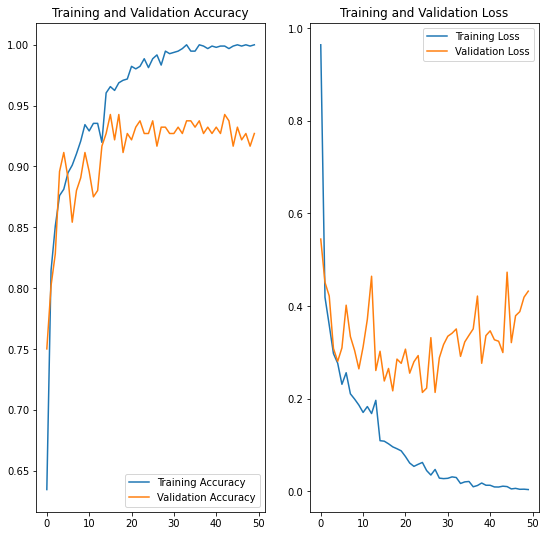

In [27]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial2.history)

# Visualizar los resultados de training y validation
acc_2 = historial2.history['accuracy']
val_acc_2 = historial2.history['val_accuracy']

loss_2 = historial2.history['loss']
val_loss_2 = historial2.history['val_loss']

epochs_range_2 = range(len(acc_2))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_2, acc_2, label='Training Accuracy')
plt.plot(epochs_range_2, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_2, loss_2, label='Training Loss')
plt.plot(epochs_range_2, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [28]:
test_loss_2, test_acc_2 = modelo2.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_2)
print('\nTest loss:', test_loss_2)

# evaluate model
loss_2 = modelo2.evaluate_generator(iteradorTest, steps=24)
print(loss_2)

3/3 - 1s - loss: 0.2580 - accuracy: 0.9375 - 533ms/epoch - 178ms/step

Test accuracy: 0.9375

Test loss: 0.2580479383468628


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


[0.2580479383468628, 0.9375]


##Loss Graph

In [29]:
# Visualize training results
loss_2 = historial2.history['loss']

val_loss_2 = historial2.history['val_loss']


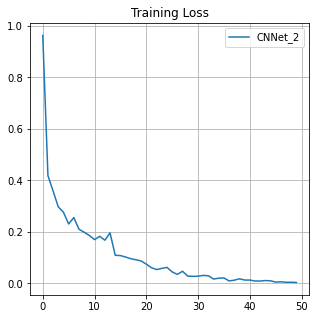

In [30]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_2, loss_2, label='CNNet_2')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_m2.pdf')

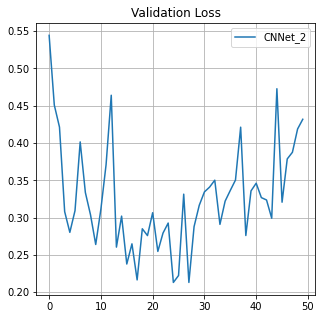

In [31]:
plt.figure(figsize=(5, 5))
plt.plot(epochs_range_2, val_loss_2, label='CNNet_2')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_loss_m2.pdf')


##Test Accuracy

In [32]:
print('Test accuracy second model:', test_acc_2)

Test accuracy second model: 0.9375


## Modelo3

In [33]:
# Modelo 3
# Arquitectura de la Red
modelo3 = keras.Sequential([
     keras.layers.Conv2D(16, 3, padding='same',
                        strides=(1,1),
                        activation='relu',
                        input_shape=input_shp),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])


##Compilación de la Red 

In [34]:
# Compilar el modelo
modelo3.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

modelo3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 flatten_3 (Flatten)         (None, 160000)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               20480128  
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                                 
Total params: 20,480,834
Trainable params: 20,480,834
Non-trainable params: 0
_________________________________________________________________


##Callbacks

In [35]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpoint3'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

##Entrenando la Red

In [36]:
print("Training model 3 ..")
historial3 = modelo3.fit_generator(iteradorTrain,
                                  validation_data=iteradorValidation,
                                  steps_per_epoch=960//96,
                                  validation_steps=240//96,
                                  epochs=50,
                                  verbose=True,
                                  callbacks=[Modle_Checkpoint])



print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = modelo3.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model 3 ..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.8822 - accuracy: 0.7229
Epoch 1: val_loss improved from inf to 0.36855, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


10/10 [==============================] - 13s 1s/step - loss: 0.8822 - accuracy: 0.7229 - val_loss: 0.3686 - val_accuracy: 0.8438
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.3479 - accuracy: 0.8396
Epoch 2: val_loss did not improve from 0.36855
10/10 [==============================] - 8s 770ms/step - loss: 0.3479 - accuracy: 0.8396 - val_loss: 0.3733 - val_accuracy: 0.8542
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.3004 - accuracy: 0.8687
Epoch 3: val_loss improved from 0.36855 to 0.35899, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


10/10 [==============================] - 10s 993ms/step - loss: 0.3004 - accuracy: 0.8687 - val_loss: 0.3590 - val_accuracy: 0.8646
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.3007 - accuracy: 0.8771
Epoch 4: val_loss improved from 0.35899 to 0.33114, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


10/10 [==============================] - 10s 965ms/step - loss: 0.3007 - accuracy: 0.8771 - val_loss: 0.3311 - val_accuracy: 0.8802
Epoch 5/50
10/10 [==============================] - ETA: 0s - loss: 0.2614 - accuracy: 0.8927
Epoch 5: val_loss did not improve from 0.33114
10/10 [==============================] - 11s 1s/step - loss: 0.2614 - accuracy: 0.8927 - val_loss: 0.3364 - val_accuracy: 0.8646
Epoch 6/50
10/10 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.9042
Epoch 6: val_loss improved from 0.33114 to 0.30046, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


10/10 [==============================] - 10s 986ms/step - loss: 0.2257 - accuracy: 0.9042 - val_loss: 0.3005 - val_accuracy: 0.8958
Epoch 7/50
10/10 [==============================] - ETA: 0s - loss: 0.2008 - accuracy: 0.9156
Epoch 7: val_loss improved from 0.30046 to 0.28911, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


10/10 [==============================] - 9s 937ms/step - loss: 0.2008 - accuracy: 0.9156 - val_loss: 0.2891 - val_accuracy: 0.8854
Epoch 8/50
10/10 [==============================] - ETA: 0s - loss: 0.1676 - accuracy: 0.9438
Epoch 8: val_loss did not improve from 0.28911
10/10 [==============================] - 8s 767ms/step - loss: 0.1676 - accuracy: 0.9438 - val_loss: 0.3122 - val_accuracy: 0.8854
Epoch 9/50
10/10 [==============================] - ETA: 0s - loss: 0.1453 - accuracy: 0.9542
Epoch 9: val_loss improved from 0.28911 to 0.22957, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


10/10 [==============================] - 10s 1s/step - loss: 0.1453 - accuracy: 0.9542 - val_loss: 0.2296 - val_accuracy: 0.9479
Epoch 10/50
10/10 [==============================] - ETA: 0s - loss: 0.1074 - accuracy: 0.9698
Epoch 10: val_loss did not improve from 0.22957
10/10 [==============================] - 8s 766ms/step - loss: 0.1074 - accuracy: 0.9698 - val_loss: 0.3061 - val_accuracy: 0.9115
Epoch 11/50
10/10 [==============================] - ETA: 0s - loss: 0.0918 - accuracy: 0.9708
Epoch 11: val_loss did not improve from 0.22957
10/10 [==============================] - 9s 863ms/step - loss: 0.0918 - accuracy: 0.9708 - val_loss: 0.2740 - val_accuracy: 0.9219
Epoch 12/50
10/10 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9823
Epoch 12: val_loss improved from 0.22957 to 0.22273, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/ch

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


10/10 [==============================] - 9s 914ms/step - loss: 0.0642 - accuracy: 0.9823 - val_loss: 0.2227 - val_accuracy: 0.9271
Epoch 13/50
10/10 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9854
Epoch 13: val_loss did not improve from 0.22273
10/10 [==============================] - 8s 769ms/step - loss: 0.0588 - accuracy: 0.9854 - val_loss: 0.2935 - val_accuracy: 0.9219
Epoch 14/50
10/10 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9906
Epoch 14: val_loss did not improve from 0.22273
10/10 [==============================] - 9s 861ms/step - loss: 0.0518 - accuracy: 0.9906 - val_loss: 0.2315 - val_accuracy: 0.9375
Epoch 15/50
10/10 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9917
Epoch 15: val_loss did not improve from 0.22273
10/10 [==============================] - 8s 762ms/step - loss: 0.0362 - accuracy: 0.9917 - val_loss: 0.2979 - val_accuracy: 0.9062
Epoch 16/50
10/10 [============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets


10/10 [==============================] - 9s 922ms/step - loss: 0.0223 - accuracy: 0.9979 - val_loss: 0.1454 - val_accuracy: 0.9323
Epoch 17/50
10/10 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9958
Epoch 17: val_loss did not improve from 0.14540
10/10 [==============================] - 8s 766ms/step - loss: 0.0245 - accuracy: 0.9958 - val_loss: 0.3151 - val_accuracy: 0.9062
Epoch 18/50
10/10 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9990
Epoch 18: val_loss did not improve from 0.14540
10/10 [==============================] - 10s 1s/step - loss: 0.0179 - accuracy: 0.9990 - val_loss: 0.3513 - val_accuracy: 0.9010
Epoch 19/50
10/10 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9979
Epoch 19: val_loss did not improve from 0.14540
10/10 [==============================] - 8s 762ms/step - loss: 0.0164 - accuracy: 0.9979 - val_loss: 0.2922 - val_accuracy: 0.9375
Epoch 20/50
10/10 [==============================

##Visualización de Datos


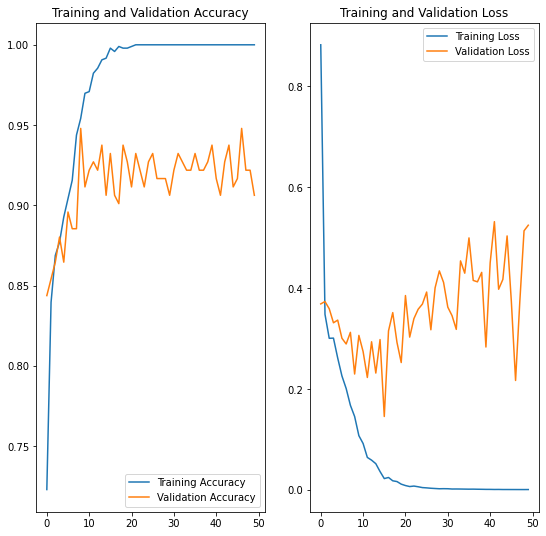

In [37]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial3.history)

# Visualizar los resultados de training y validation
acc_3 = historial3.history['accuracy']
val_acc_3 = historial3.history['val_accuracy']

loss_3 = historial3.history['loss']
val_loss_3 = historial3.history['val_loss']

epochs_range_3 = range(len(acc_3))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_3, acc_3, label='Training Accuracy')
plt.plot(epochs_range_3, val_acc_3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_3, loss_3, label='Training Loss')
plt.plot(epochs_range_3, val_loss_3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [38]:
test_loss_3, test_acc_3 = modelo3.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_3)
print('\nTest loss:', test_loss_3)

# evaluate model
loss_3 = modelo3.evaluate_generator(iteradorTest, steps=24)
print(loss_3)

3/3 - 1s - loss: 0.3405 - accuracy: 0.9167 - 868ms/epoch - 289ms/step

Test accuracy: 0.9166666865348816

Test loss: 0.34046536684036255


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


[0.34046536684036255, 0.9166666865348816]


##Loss Graph

In [39]:
# Visualize training results
loss_3 = historial3.history['loss']

val_loss_3 = historial3.history['val_loss']


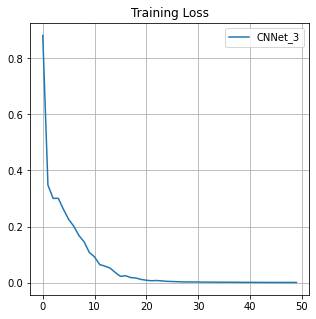

In [40]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_3, loss_3, label='CNNet_3')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_m3.pdf')

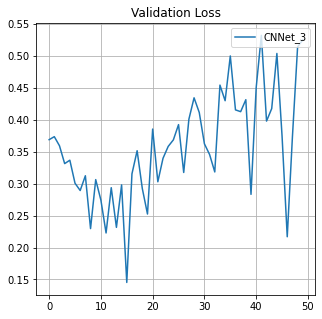

In [41]:
plt.figure(figsize=(5, 5))
plt.plot(epochs_range_3, val_loss_3, label='CNNet_3')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_m3.pdf')


##Test Accuracy

In [42]:
print('Test accuracy third model:', test_acc_3)

Test accuracy third model: 0.9166666865348816


## Cargando dataset

In [43]:
IMAGEN_ALTO = 100
IMAGEN_ANCHO = 100
NUM_COLORES = 3
input_shp = (IMAGEN_ALTO,IMAGEN_ANCHO,3)

## Modelo4

In [44]:
# Modelo 4
# Arquitectura de la Red
# Arquitectura de la Red
modelo4 = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', strides=(1,1),
                        activation='relu', input_shape=input_shp),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.15),

    keras.layers.Conv2D(32, 3, padding='same', strides=(1,1),
                        activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.15),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(2, activation='softmax')
])

##Compilación de la Red 

In [45]:
# Compilar el modelo
modelo4.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

modelo4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 32)       

In [46]:
#carga e iteracion carpeta 'train' (960 elementos por subcarpeta)
generadorDatos = ImageDataGenerator(rescale=1. / 255)



iteradorTrain = generadorDatos.flow_from_directory(directory=directorioBase + '/train',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorValidation = generadorDatos.flow_from_directory(directory=directorioBase + '/val',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorTest = generadorDatos.flow_from_directory(directory=directorioBase+'/test',
                                      class_mode='binary',  shuffle=True,
                                      batch_size=96, target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


##Callbacks

In [47]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpoint4'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

##Entrenando la Red

In [48]:
print("Training model 4 ..")
historial4 = modelo4.fit_generator(iteradorTrain,
                                  validation_data=iteradorValidation,
                                  steps_per_epoch=960//96,
                                  validation_steps=240//96,
                                  epochs=50,
                                  verbose=True,
                                  callbacks=[Modle_Checkpoint])



print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = modelo4.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model 4 ..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.4716 - accuracy: 0.7708
Epoch 1: val_loss improved from inf to 0.39850, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 14s 1s/step - loss: 0.4716 - accuracy: 0.7708 - val_loss: 0.3985 - val_accuracy: 0.8177
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.3807 - accuracy: 0.8375
Epoch 2: val_loss improved from 0.39850 to 0.39564, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.3807 - accuracy: 0.8375 - val_loss: 0.3956 - val_accuracy: 0.8490
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.3375 - accuracy: 0.8417
Epoch 3: val_loss improved from 0.39564 to 0.35560, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.3375 - accuracy: 0.8417 - val_loss: 0.3556 - val_accuracy: 0.8542
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.2900 - accuracy: 0.8833
Epoch 4: val_loss improved from 0.35560 to 0.33996, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.2900 - accuracy: 0.8833 - val_loss: 0.3400 - val_accuracy: 0.8646
Epoch 5/50
10/10 [==============================] - ETA: 0s - loss: 0.2754 - accuracy: 0.8865
Epoch 5: val_loss did not improve from 0.33996
10/10 [==============================] - 9s 923ms/step - loss: 0.2754 - accuracy: 0.8865 - val_loss: 0.3410 - val_accuracy: 0.8594
Epoch 6/50
10/10 [==============================] - ETA: 0s - loss: 0.2497 - accuracy: 0.8938
Epoch 6: val_loss did not improve from 0.33996
10/10 [==============================] - 10s 949ms/step - loss: 0.2497 - accuracy: 0.8938 - val_loss: 0.3459 - val_accuracy: 0.8698
Epoch 7/50
10/10 [==============================] - ETA: 0s - loss: 0.2437 - accuracy: 0.9010
Epoch 7: val_loss improved from 0.33996 to 0.30801, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpo

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 12s 1s/step - loss: 0.2437 - accuracy: 0.9010 - val_loss: 0.3080 - val_accuracy: 0.8854
Epoch 8/50
10/10 [==============================] - ETA: 0s - loss: 0.2336 - accuracy: 0.9083
Epoch 8: val_loss did not improve from 0.30801
10/10 [==============================] - 9s 915ms/step - loss: 0.2336 - accuracy: 0.9083 - val_loss: 0.3084 - val_accuracy: 0.8854
Epoch 9/50
10/10 [==============================] - ETA: 0s - loss: 0.2458 - accuracy: 0.9021
Epoch 9: val_loss did not improve from 0.30801
10/10 [==============================] - 9s 924ms/step - loss: 0.2458 - accuracy: 0.9021 - val_loss: 0.3109 - val_accuracy: 0.8958
Epoch 10/50
10/10 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9115
Epoch 10: val_loss improved from 0.30801 to 0.28140, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkp

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.2136 - accuracy: 0.9115 - val_loss: 0.2814 - val_accuracy: 0.9010
Epoch 11/50
10/10 [==============================] - ETA: 0s - loss: 0.2097 - accuracy: 0.9240
Epoch 11: val_loss improved from 0.28140 to 0.23731, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 11s 1s/step - loss: 0.2097 - accuracy: 0.9240 - val_loss: 0.2373 - val_accuracy: 0.9115
Epoch 12/50
10/10 [==============================] - ETA: 0s - loss: 0.1793 - accuracy: 0.9354
Epoch 12: val_loss did not improve from 0.23731
10/10 [==============================] - 9s 921ms/step - loss: 0.1793 - accuracy: 0.9354 - val_loss: 0.2753 - val_accuracy: 0.9062
Epoch 13/50
10/10 [==============================] - ETA: 0s - loss: 0.1993 - accuracy: 0.9229
Epoch 13: val_loss did not improve from 0.23731
10/10 [==============================] - 9s 925ms/step - loss: 0.1993 - accuracy: 0.9229 - val_loss: 0.2819 - val_accuracy: 0.9010
Epoch 14/50
10/10 [==============================] - ETA: 0s - loss: 0.1655 - accuracy: 0.9375
Epoch 14: val_loss did not improve from 0.23731
10/10 [==============================] - 9s 919ms/step - loss: 0.1655 - accuracy: 0.9375 - val_loss: 0.2840 - val_accuracy: 0.9010
Epoch 15/50
10/10 [==============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.1793 - accuracy: 0.9312 - val_loss: 0.2309 - val_accuracy: 0.9010
Epoch 16/50
10/10 [==============================] - ETA: 0s - loss: 0.1556 - accuracy: 0.9312
Epoch 16: val_loss did not improve from 0.23088
10/10 [==============================] - 9s 932ms/step - loss: 0.1556 - accuracy: 0.9312 - val_loss: 0.2420 - val_accuracy: 0.9115
Epoch 17/50
10/10 [==============================] - ETA: 0s - loss: 0.1485 - accuracy: 0.9396
Epoch 17: val_loss improved from 0.23088 to 0.19569, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.1485 - accuracy: 0.9396 - val_loss: 0.1957 - val_accuracy: 0.9375
Epoch 18/50
10/10 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9448
Epoch 18: val_loss did not improve from 0.19569
10/10 [==============================] - 11s 1s/step - loss: 0.1399 - accuracy: 0.9448 - val_loss: 0.2175 - val_accuracy: 0.9271
Epoch 19/50
10/10 [==============================] - ETA: 0s - loss: 0.1358 - accuracy: 0.9510
Epoch 19: val_loss did not improve from 0.19569
10/10 [==============================] - 9s 917ms/step - loss: 0.1358 - accuracy: 0.9510 - val_loss: 0.2052 - val_accuracy: 0.9323
Epoch 20/50
10/10 [==============================] - ETA: 0s - loss: 0.1163 - accuracy: 0.9573
Epoch 20: val_loss improved from 0.19569 to 0.18772, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/chec

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 11s 1s/step - loss: 0.1163 - accuracy: 0.9573 - val_loss: 0.1877 - val_accuracy: 0.9323
Epoch 21/50
10/10 [==============================] - ETA: 0s - loss: 0.1032 - accuracy: 0.9635
Epoch 21: val_loss did not improve from 0.18772
10/10 [==============================] - 9s 929ms/step - loss: 0.1032 - accuracy: 0.9635 - val_loss: 0.1997 - val_accuracy: 0.9583
Epoch 22/50
10/10 [==============================] - ETA: 0s - loss: 0.0979 - accuracy: 0.9667
Epoch 22: val_loss did not improve from 0.18772
10/10 [==============================] - 9s 916ms/step - loss: 0.0979 - accuracy: 0.9667 - val_loss: 0.1941 - val_accuracy: 0.9479
Epoch 23/50
10/10 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.9635
Epoch 23: val_loss did not improve from 0.18772
10/10 [==============================] - 9s 924ms/step - loss: 0.0943 - accuracy: 0.9635 - val_loss: 0.2152 - val_accuracy: 0.9479
Epoch 24/50
10/10 [==============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.0744 - accuracy: 0.9708 - val_loss: 0.1807 - val_accuracy: 0.9583
Epoch 26/50
10/10 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.9719
Epoch 26: val_loss did not improve from 0.18074
10/10 [==============================] - 9s 918ms/step - loss: 0.0787 - accuracy: 0.9719 - val_loss: 0.2250 - val_accuracy: 0.9479
Epoch 27/50
10/10 [==============================] - ETA: 0s - loss: 0.0649 - accuracy: 0.9802
Epoch 27: val_loss did not improve from 0.18074
10/10 [==============================] - 9s 914ms/step - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.2291 - val_accuracy: 0.9583
Epoch 28/50
10/10 [==============================] - ETA: 0s - loss: 0.0794 - accuracy: 0.9667
Epoch 28: val_loss did not improve from 0.18074
10/10 [==============================] - 9s 916ms/step - loss: 0.0794 - accuracy: 0.9667 - val_loss: 0.2033 - val_accuracy: 0.9531
Epoch 29/50
10/10 [==============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.1762 - val_accuracy: 0.9427
Epoch 37/50
10/10 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9896
Epoch 37: val_loss did not improve from 0.17617
10/10 [==============================] - 9s 915ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.2217 - val_accuracy: 0.9531
Epoch 38/50
10/10 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9823
Epoch 38: val_loss did not improve from 0.17617
10/10 [==============================] - 9s 922ms/step - loss: 0.0437 - accuracy: 0.9823 - val_loss: 0.2702 - val_accuracy: 0.9427
Epoch 39/50
10/10 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9802
Epoch 39: val_loss did not improve from 0.17617
10/10 [==============================] - 9s 917ms/step - loss: 0.0489 - accuracy: 0.9802 - val_loss: 0.2435 - val_accuracy: 0.9479
Epoch 40/50
10/10 [==============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets


10/10 [==============================] - 10s 1s/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.1648 - val_accuracy: 0.9479
Epoch 49/50
10/10 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9906
Epoch 49: val_loss did not improve from 0.16484
10/10 [==============================] - 9s 919ms/step - loss: 0.0232 - accuracy: 0.9906 - val_loss: 0.2468 - val_accuracy: 0.9635
Epoch 50/50
10/10 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9937
Epoch 50: val_loss did not improve from 0.16484
10/10 [==============================] - 9s 932ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.2884 - val_accuracy: 0.9531
Modelo entrenado!
Matriz de confusion:  [[493 467]
 [467 493]]


##Visualización de Datos


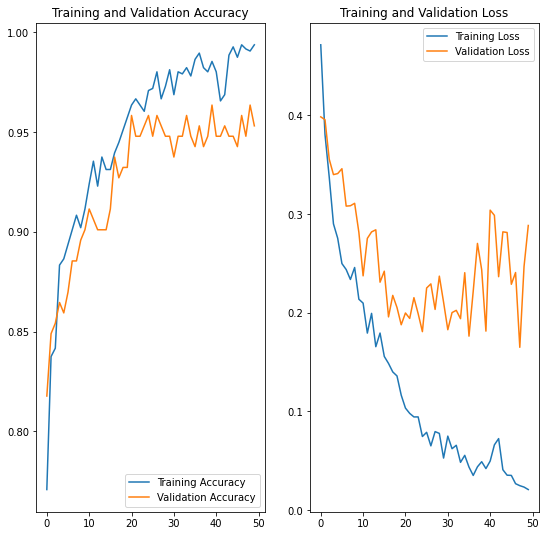

In [49]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial4.history)

# Visualizar los resultados de training y validation
acc_4 = historial4.history['accuracy']
val_acc_4 = historial4.history['val_accuracy']

loss_4 = historial4.history['loss']
val_loss_4 = historial4.history['val_loss']

epochs_range_4 = range(len(acc_4))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_4, acc_4, label='Training Accuracy')
plt.plot(epochs_range_4, val_acc_4, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_4, loss_4, label='Training Loss')
plt.plot(epochs_range_4, val_loss_4, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [50]:
test_loss_4, test_acc_4 = modelo4.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_4)
print('\nTest loss:', test_loss_4)

# evaluate model
loss_4 = modelo4.evaluate_generator(iteradorTest, steps=24)
print(loss_4)

3/3 - 1s - loss: 0.1597 - accuracy: 0.9542 - 913ms/epoch - 304ms/step

Test accuracy: 0.9541666507720947

Test loss: 0.15968114137649536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


[0.15968115627765656, 0.9541666507720947]


##Loss Graph

In [51]:
# Visualize training results
loss_4 = historial4.history['loss']

val_loss_4 = historial4.history['val_loss']


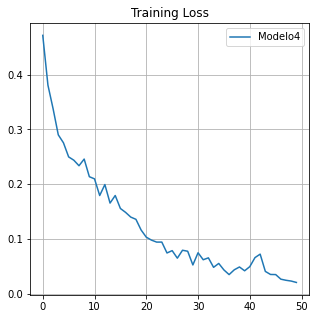

In [52]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_4, loss_4, label='Modelo4')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_m4.pdf')

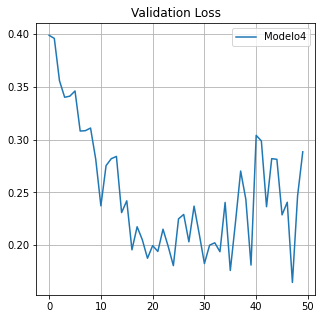

In [53]:
plt.figure(figsize=(5, 5))
plt.plot(epochs_range_4, val_loss_4, label='Modelo4')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_loss_m4.pdf')


##Test Accuracy

In [54]:
print('Test accuracy first model:', test_acc_4)

Test accuracy first model: 0.9541666507720947


## ModeloVGG16

In [55]:
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(input_shp),
                                               include_top=False,
                                               weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [56]:
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer =Dense(2, activation='softmax')

In [57]:
model_vgg = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])

model_vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_vgg.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_9 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


##Compilación de la Red 

In [58]:
#carga e iteracion carpeta 'train' (960 elementos por subcarpeta)
generadorDatos = ImageDataGenerator(rescale=1. / 255)



iteradorTrain = generadorDatos.flow_from_directory(directory=directorioBase + '/train',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorValidation = generadorDatos.flow_from_directory(directory=directorioBase + '/val',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorTest = generadorDatos.flow_from_directory(directory=directorioBase+'/test',
                                      class_mode='binary',  shuffle=True,
                                      batch_size=96, target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [59]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpointVGG16'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=0
)

##Early_Stopping = tf.keras.callbacks.EarlyStopping(
##    monitor='val_loss',
##    patience=5,
##    verbose=1,
##    restore_best_weights='True',
##    min_delta=0.1
##)


##Entrenando la Red

In [60]:
print("Training model VGG16 ..")
historial_vgg = model_vgg.fit( iteradorTrain,
                                validation_data=iteradorValidation,
                                steps_per_epoch=960//96,
                                validation_steps=240//96,
                                epochs=50,
                                verbose=1,
                                shuffle=True,
                                callbacks=[Modle_Checkpoint]
                                )




print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = model_vgg.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model VGG16 ..
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.5656INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 120s 12s/step - loss: 0.6833 - accuracy: 0.5656 - val_loss: 0.6589 - val_accuracy: 0.6458
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.6403 - accuracy: 0.6979INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.6403 - accuracy: 0.6979 - val_loss: 0.6258 - val_accuracy: 0.7396
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.7219INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.6079 - accuracy: 0.7219 - val_loss: 0.5995 - val_accuracy: 0.7031
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.5917 - accuracy: 0.6865INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.5917 - accuracy: 0.6865 - val_loss: 0.5920 - val_accuracy: 0.6875
Epoch 5/50
10/10 [==============================] - ETA: 0s - loss: 0.5709 - accuracy: 0.7250INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.5709 - accuracy: 0.7250 - val_loss: 0.5514 - val_accuracy: 0.7240
Epoch 6/50
10/10 [==============================] - ETA: 0s - loss: 0.5516 - accuracy: 0.7229INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 114s 12s/step - loss: 0.5516 - accuracy: 0.7229 - val_loss: 0.5456 - val_accuracy: 0.7396
Epoch 7/50
10/10 [==============================] - ETA: 0s - loss: 0.5449 - accuracy: 0.7167INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.5449 - accuracy: 0.7167 - val_loss: 0.5311 - val_accuracy: 0.7292
Epoch 8/50
10/10 [==============================] - ETA: 0s - loss: 0.5115 - accuracy: 0.7573INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 114s 12s/step - loss: 0.5115 - accuracy: 0.7573 - val_loss: 0.5305 - val_accuracy: 0.7292
Epoch 9/50
10/10 [==============================] - ETA: 0s - loss: 0.5151 - accuracy: 0.7344INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.5151 - accuracy: 0.7344 - val_loss: 0.5178 - val_accuracy: 0.7344
Epoch 10/50
10/10 [==============================] - ETA: 0s - loss: 0.5018 - accuracy: 0.7469INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 114s 12s/step - loss: 0.5018 - accuracy: 0.7469 - val_loss: 0.4805 - val_accuracy: 0.7812
Epoch 11/50
10/10 [==============================] - 112s 11s/step - loss: 0.4798 - accuracy: 0.7906 - val_loss: 0.4806 - val_accuracy: 0.7865
Epoch 12/50
10/10 [==============================] - 112s 11s/step - loss: 0.4730 - accuracy: 0.7750 - val_loss: 0.4832 - val_accuracy: 0.7865
Epoch 13/50
10/10 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.8031INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.4689 - accuracy: 0.8031 - val_loss: 0.4655 - val_accuracy: 0.8125
Epoch 14/50
10/10 [==============================] - ETA: 0s - loss: 0.4504 - accuracy: 0.8073INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 114s 12s/step - loss: 0.4504 - accuracy: 0.8073 - val_loss: 0.4623 - val_accuracy: 0.8021
Epoch 15/50
10/10 [==============================] - ETA: 0s - loss: 0.4498 - accuracy: 0.7990INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.4498 - accuracy: 0.7990 - val_loss: 0.4411 - val_accuracy: 0.8385
Epoch 16/50
10/10 [==============================] - ETA: 0s - loss: 0.4388 - accuracy: 0.8156INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.4388 - accuracy: 0.8156 - val_loss: 0.4319 - val_accuracy: 0.8438
Epoch 17/50
10/10 [==============================] - ETA: 0s - loss: 0.4365 - accuracy: 0.8167INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.4365 - accuracy: 0.8167 - val_loss: 0.4241 - val_accuracy: 0.8385
Epoch 18/50
10/10 [==============================] - ETA: 0s - loss: 0.4271 - accuracy: 0.8240INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 116s 12s/step - loss: 0.4271 - accuracy: 0.8240 - val_loss: 0.4228 - val_accuracy: 0.8281
Epoch 19/50
10/10 [==============================] - ETA: 0s - loss: 0.4112 - accuracy: 0.8396INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.4112 - accuracy: 0.8396 - val_loss: 0.4108 - val_accuracy: 0.8490
Epoch 20/50
10/10 [==============================] - 112s 11s/step - loss: 0.4076 - accuracy: 0.8365 - val_loss: 0.4212 - val_accuracy: 0.8333
Epoch 21/50
10/10 [==============================] - ETA: 0s - loss: 0.4005 - accuracy: 0.8469INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.4005 - accuracy: 0.8469 - val_loss: 0.4057 - val_accuracy: 0.8385
Epoch 22/50
10/10 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.8521INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3870 - accuracy: 0.8521 - val_loss: 0.3912 - val_accuracy: 0.8542
Epoch 23/50
10/10 [==============================] - 112s 11s/step - loss: 0.3865 - accuracy: 0.8354 - val_loss: 0.3952 - val_accuracy: 0.8490
Epoch 24/50
10/10 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.8438INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3921 - accuracy: 0.8438 - val_loss: 0.3903 - val_accuracy: 0.8385
Epoch 25/50
10/10 [==============================] - ETA: 0s - loss: 0.3820 - accuracy: 0.8490INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3820 - accuracy: 0.8490 - val_loss: 0.3638 - val_accuracy: 0.8698
Epoch 26/50
10/10 [==============================] - 111s 11s/step - loss: 0.3828 - accuracy: 0.8542 - val_loss: 0.3747 - val_accuracy: 0.8698
Epoch 27/50
10/10 [==============================] - 112s 11s/step - loss: 0.3799 - accuracy: 0.8500 - val_loss: 0.3734 - val_accuracy: 0.8490
Epoch 28/50
10/10 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.8573INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 114s 12s/step - loss: 0.3691 - accuracy: 0.8573 - val_loss: 0.3571 - val_accuracy: 0.8542
Epoch 29/50
10/10 [==============================] - 112s 11s/step - loss: 0.3516 - accuracy: 0.8781 - val_loss: 0.3585 - val_accuracy: 0.8542
Epoch 30/50
10/10 [==============================] - ETA: 0s - loss: 0.3587 - accuracy: 0.8656INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3587 - accuracy: 0.8656 - val_loss: 0.3377 - val_accuracy: 0.8802
Epoch 31/50
10/10 [==============================] - 112s 11s/step - loss: 0.3549 - accuracy: 0.8740 - val_loss: 0.3566 - val_accuracy: 0.8594
Epoch 32/50
10/10 [==============================] - 112s 11s/step - loss: 0.3513 - accuracy: 0.8719 - val_loss: 0.3561 - val_accuracy: 0.8698
Epoch 33/50
10/10 [==============================] - 112s 11s/step - loss: 0.3433 - accuracy: 0.8729 - val_loss: 0.3440 - val_accuracy: 0.8802
Epoch 34/50
10/10 [==============================] - 112s 11s/step - loss: 0.3426 - accuracy: 0.8802 - val_loss: 0.3532 - val_accuracy: 0.8594
Epoch 35/50
10/10 [==============================] - 115s 12s/step - loss: 0.3458 - accuracy: 0.8719 - val_loss: 0.3457 - val_accuracy: 0.8594
Epoch 36/50
10/10 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.8823INFO:tensorflow:Assets written to: /content/drive/MyDrive/Mi

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 116s 12s/step - loss: 0.3384 - accuracy: 0.8823 - val_loss: 0.3341 - val_accuracy: 0.8594
Epoch 37/50
10/10 [==============================] - ETA: 0s - loss: 0.3284 - accuracy: 0.8875INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3284 - accuracy: 0.8875 - val_loss: 0.3127 - val_accuracy: 0.8854
Epoch 38/50
10/10 [==============================] - 112s 11s/step - loss: 0.3280 - accuracy: 0.8875 - val_loss: 0.3185 - val_accuracy: 0.8750
Epoch 39/50
10/10 [==============================] - 112s 11s/step - loss: 0.3357 - accuracy: 0.8750 - val_loss: 0.3197 - val_accuracy: 0.8906
Epoch 40/50
10/10 [==============================] - 112s 11s/step - loss: 0.3297 - accuracy: 0.8844 - val_loss: 0.3172 - val_accuracy: 0.8854
Epoch 41/50
10/10 [==============================] - ETA: 0s - loss: 0.3088 - accuracy: 0.8958INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3088 - accuracy: 0.8958 - val_loss: 0.3006 - val_accuracy: 0.9010
Epoch 42/50
10/10 [==============================] - 112s 11s/step - loss: 0.3246 - accuracy: 0.8802 - val_loss: 0.3232 - val_accuracy: 0.8854
Epoch 43/50
10/10 [==============================] - ETA: 0s - loss: 0.3102 - accuracy: 0.8958INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3102 - accuracy: 0.8958 - val_loss: 0.2960 - val_accuracy: 0.9062
Epoch 44/50
10/10 [==============================] - 112s 11s/step - loss: 0.2989 - accuracy: 0.9052 - val_loss: 0.3159 - val_accuracy: 0.8906
Epoch 45/50
10/10 [==============================] - ETA: 0s - loss: 0.3029 - accuracy: 0.8969INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3029 - accuracy: 0.8969 - val_loss: 0.2950 - val_accuracy: 0.8906
Epoch 46/50
10/10 [==============================] - ETA: 0s - loss: 0.3052 - accuracy: 0.8979INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpointVGG16/assets


10/10 [==============================] - 115s 12s/step - loss: 0.3052 - accuracy: 0.8979 - val_loss: 0.2829 - val_accuracy: 0.9115
Epoch 47/50
10/10 [==============================] - 112s 11s/step - loss: 0.3053 - accuracy: 0.8948 - val_loss: 0.2959 - val_accuracy: 0.8698
Epoch 48/50
10/10 [==============================] - 112s 11s/step - loss: 0.2990 - accuracy: 0.9000 - val_loss: 0.2953 - val_accuracy: 0.8906
Epoch 49/50
10/10 [==============================] - 112s 11s/step - loss: 0.3026 - accuracy: 0.8958 - val_loss: 0.2870 - val_accuracy: 0.9010
Epoch 50/50
10/10 [==============================] - 111s 11s/step - loss: 0.2974 - accuracy: 0.8979 - val_loss: 0.2985 - val_accuracy: 0.8906
Modelo entrenado!
Matriz de confusion:  [[447 513]
 [482 478]]


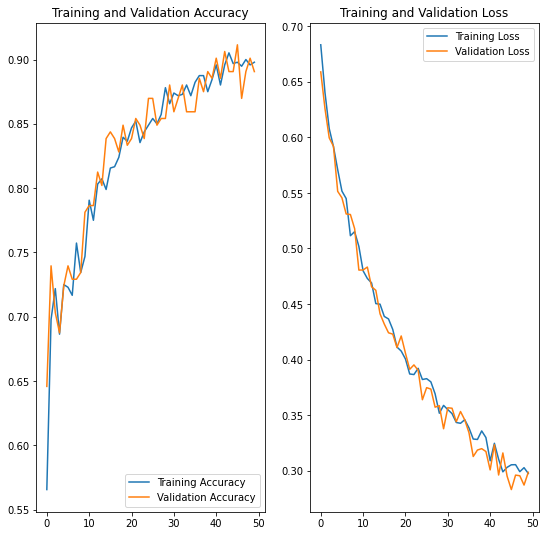

In [61]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial_vgg.history)

# Visualizar los resultados de training y validation
acc_vgg = historial_vgg.history['accuracy']
val_acc_vgg = historial_vgg.history['val_accuracy']

loss_vgg = historial_vgg.history['loss']
val_loss_vgg = historial_vgg.history['val_loss']

epochs_range_vgg = range(len(acc_vgg))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_vgg, acc_vgg, label='Training Accuracy')
plt.plot(epochs_range_vgg, val_acc_vgg, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_vgg, loss_vgg, label='Training Loss')
plt.plot(epochs_range_vgg, val_loss_vgg, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [62]:
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_vgg)

print('\nTest loss:', test_loss_vgg)

# evaluate model
loss_vgg = model_vgg.evaluate_generator(iteradorTest, steps=24)
print(loss_1)

3/3 - 23s - loss: 0.3183 - accuracy: 0.8875 - 23s/epoch - 8s/step

Test accuracy: 0.887499988079071

Test loss: 0.3183470368385315


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.6031172275543213, 0.41481536626815796, 0.3299263119697571, 0.3113897442817688, 0.3109123110771179, 0.30193787813186646, 0.2964244782924652, 0.27971747517585754, 0.2910439372062683, 0.28717994689941406, 0.27324122190475464, 0.2934989929199219, 0.2832755148410797, 0.284859836101532, 0.3154659569263458, 0.28678449988365173, 0.2853319048881531, 0.2522159516811371, 0.24216285347938538, 0.2525007128715515, 0.26866990327835083, 0.2631300687789917, 0.23509027063846588, 0.23440799117088318, 0.23925162851810455, 0.24758002161979675, 0.22536560893058777, 0.2550801932811737, 0.23903153836727142, 0.2513411343097687, 0.2306869477033615, 0.2424345314502716, 0.2236020267009735, 0.2231345921754837, 0.20763114094734192, 0.23543024063110352, 0.2519868016242981, 0.2309902012348175, 0.2241431176662445, 0.25956693291664124, 0.22764377295970917, 0.24487310647964478, 0.2109082192182541, 0.21692852675914764, 0.20103719830513, 0.2107326239347458, 0.20410077273845673, 0.22066745162010193, 0.21214227378368378,

In [63]:
# Visualize training results
loss_vgg = historial_vgg.history['loss']

val_loss_vgg = historial_vgg.history['val_loss']


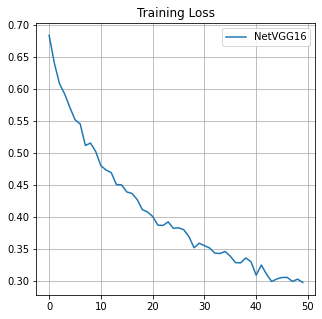

In [64]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_vgg, loss_vgg, label='NetVGG16')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_mRes.pdf')

# All models together Training accuracy graph

In [65]:
# Visualize training results
acc_1 = historial1.history['accuracy']
acc_2 = historial2.history['accuracy']
acc_3 = historial3.history['accuracy']
acc_4 = historial4.history['accuracy']
acc_vgg = historial_vgg.history['accuracy']
val_acc_1 = historial1.history['val_accuracy']
val_acc_2 = historial2.history['val_accuracy']
val_acc_3 = historial3.history['val_accuracy']
val_acc_4 = historial4.history['val_accuracy']
val_acc_vgg = historial_vgg.history['val_accuracy']

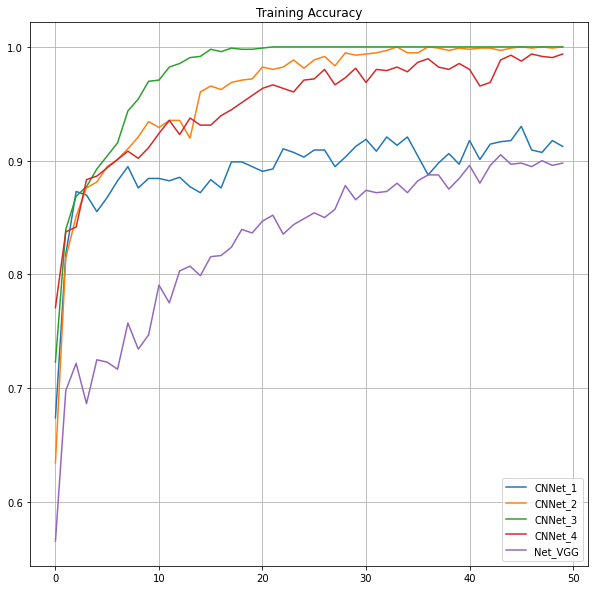

In [66]:
#epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.plot(epochs_range_1, acc_1, label='CNNet_1')
plt.plot(epochs_range_2, acc_2, label='CNNet_2')
plt.plot(epochs_range_3, acc_3, label='CNNet_3')
plt.plot(epochs_range_4, acc_4, label='CNNet_4')
#plt.plot(epochs_range_3, acc_4, label='Net_4')
plt.plot(epochs_range_vgg, acc_vgg, label='Net_VGG')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.grid()
plt.savefig(directorioBase+'/Train_all.pdf')

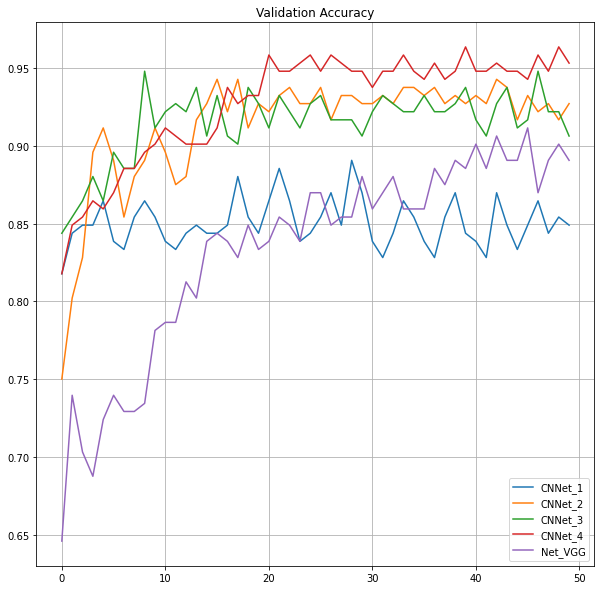

In [67]:
plt.figure(figsize=(10, 10))
plt.plot(epochs_range_1, val_acc_1, label='CNNet_1')
plt.plot(epochs_range_2, val_acc_2, label='CNNet_2')
plt.plot(epochs_range_3, val_acc_3, label='CNNet_3')
plt.plot(epochs_range_4, val_acc_4, label='CNNet_4')
#plt.plot(epochs_range_3, val_acc_4, label='Net_4')
plt.plot(epochs_range_vgg, val_acc_vgg, label='Net_VGG')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')
plt.grid()
plt.savefig(directorioBase+'/Validation_all.pdf')



# Loss

In [68]:
# Visualize training results
loss_1 = historial1.history['loss']
loss_2 = historial2.history['loss']
loss_3 = historial3.history['loss']
loss_4 = historial4.history['loss']
#loss_4 = history_4.history['loss']
loss_vgg = historial_vgg.history['loss']
val_loss_1 = historial1.history['val_loss']
val_loss2 = historial2.history['val_loss']
val_loss_3 = historial3.history['val_loss']
val_loss_4 = historial4.history['val_loss']
#val_loss_4 = history_4.history['val_loss']
val_loss_vgg = historial_vgg.history['val_loss']


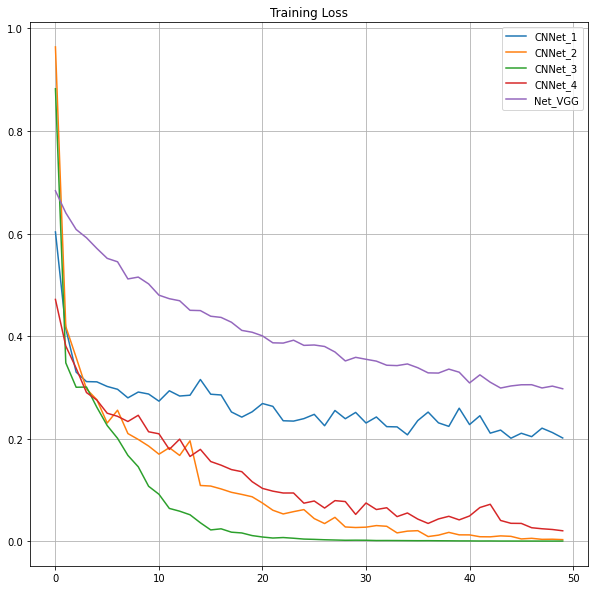

In [69]:
#epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.plot(epochs_range_1, loss_1, label='CNNet_1')
plt.plot(epochs_range_2, loss_2, label='CNNet_2')
plt.plot(epochs_range_3, loss_3, label='CNNet_3')
plt.plot(epochs_range_4, loss_4, label='CNNet_4')
#plt.plot(epochs_range_3, loss_4, label='Net_4')
plt.plot(epochs_range_vgg, loss_vgg, label='Net_VGG')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_all.pdf')

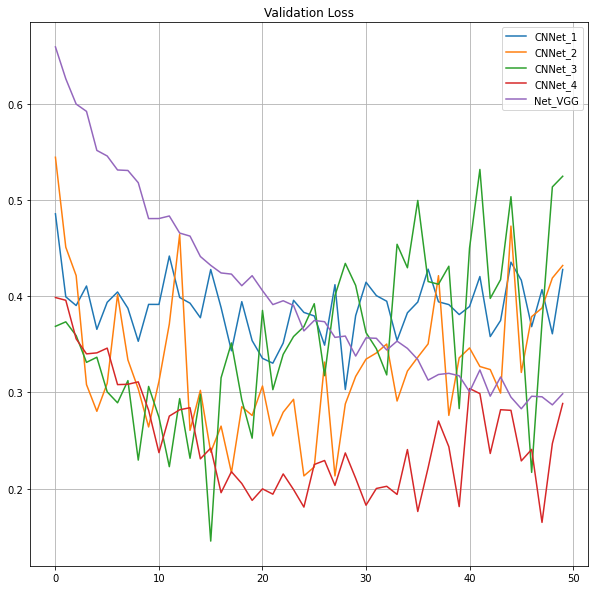

In [70]:
plt.figure(figsize=(10, 10))
plt.plot(epochs_range_1, val_loss_1, label='CNNet_1')
plt.plot(epochs_range_2, val_loss_2, label='CNNet_2')
plt.plot(epochs_range_3, val_loss_3, label='CNNet_3')
plt.plot(epochs_range_4, val_loss_4, label='CNNet_4')
#plt.plot(epochs_range_3, val_loss_4, label='Net_4')
plt.plot(epochs_range_vgg, val_loss_vgg, label='Net_VGG')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_loss_all.pdf')



# Accuracy on test set

In [71]:
print('Test accuracy first model:', test_acc_1)
print('Test accuracy second model:', test_acc_2)
print('Test accuracy third model:', test_acc_3)
print('Test accuracy fourth model (mejora del 3):', test_acc_4)
#print('Test accuracy 3 model:', test_acc_4)
print('Test accuracy vgg model:', test_acc_vgg)

Test accuracy first model: 0.875
Test accuracy second model: 0.9375
Test accuracy third model: 0.9166666865348816
Test accuracy fourth model (mejora del 3): 0.9541666507720947
Test accuracy vgg model: 0.887499988079071
